### 混淆矩阵（Confusion Matrix）
混淆矩阵是能够比较全面的反映模型的性能
- TP：真正例，实际为正预测为正；
- FP：假正例，实际为负但预测为正；
- FN：假反例，实际为正但预测为负；
- TN：真反例，实际为负预测为负

从混淆矩阵能够衍生出很多的指标来
- 查准率（精准率）：Precision = TP / (TP+FP)；
- 查全率（召回率）：Recall = TP / (TP+FN)；
- 正确率（准确率）：Accuracy = (TP+TN) / (TP+FP+TN+FN) 
- F值（F1-scores）：Precision和Recall加权调和平均数，并假设两者一样重要。

 　　F1-score = (2Recall*Precision) / (Recall + Precision)
   
   
查准率和查全率是一对矛盾的度量。一般来说，查准率高时，查全率往往偏低；而查全率高时，查准率往往偏低。通常只有在一些简单任务中，才可能使二者都很高

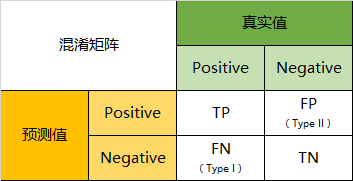
---
- **对于一个车企的质检系统，精准率/召回率 哪个比较重要？**
- **对于一个人脸支付系统，精准率/召回率 哪个比较重要？**

In [6]:
pred = [0,0,0,1,0,0,1]
real = [0,0,1,0,0,0,1]
confusion_matrix(pred,real)

Precision: 0.5
Recall: 0.5
       Negative  Positive
False         4         1
True          1         1


,Negative,Positive
False,4,1
True,1,1


In [5]:
import pandas as pd

def confusion_matrix(pred,real):
    x = pd.DataFrame()
    x['label'] = real
    x['predict'] = pred

    TruePositive = sum(x[x['predict']==1]['label']) #取预测为1的，并且真实为1的样本数量总和
    FalsePositive = sum(1-x[x['predict']==1]['label'])
    TrueNegative = sum(1-x[x['predict']==0]['label'])
    FalseNegative = sum(x[x['predict']==0]['label'])

    Precision = TruePositive/(TruePositive+FalsePositive)
    Recall = TruePositive/(TruePositive+FalseNegative)
    print('Precision: {}'.format(Precision))
    print('Recall: {}'.format(Recall))
    _confusion_matrix = pd.DataFrame({
                    'Negative':{'True':FalseNegative,'False':TrueNegative},
                    'Positive':{'True':TruePositive,'False':FalsePositive}                            
                    })        
    print(_confusion_matrix)
    return _confusion_matrix

### ROC/AUC
AUC（Area Under the ROC Curve）指标是在二分类问题中，模型评估阶段常被用作最重要的评估指标来衡量模型的稳定性。
根据混淆矩阵，我们可以得到另外两个指标：
 
- 真正例率，True Positive Rate：Recall = TP/ (TP+FN)
- 假正例率， False Postive Rate：FPR = FP/(TN+FP)

另外，真正率是正确预测到的正例数与实际正例数的比值，所以又称为灵敏度（敏感性，sensitive）；
对应于灵敏度有一个特异度（特效性，specificity）是正确预测到的负例数与实际负例数的比值（NPV = TN / (TN+FN)）。
 
我们以真正例率（TPR）作为纵轴，以假正例率（FPR）作为横轴作图，便得到了ROC曲线，而AUC则是ROC曲线下的面积。AUC的取值为[0.5-1]，0.5对应于对角线的“随机猜测模型”。

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

def illus_roc_curve(real,pred):
    # Compute ROC curve and ROC area for each class 
    
    fpr,tpr,threshold = roc_curve(real, pred) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

## LogisticRegression
优点：
    - 容易使用和解释。
    - 不容易过拟合

缺点：
    - 对模型中自变量多重共线性较为敏感，例如两个高度相关自变量同时放入模型，可能导致较弱的一个自变量回归符号不符合预期，符号被扭转。需要利用因子分析或者变量聚类分析等手段来选择代表性的自变量，以减少候选变量之间的相关性；
    - 对极端值敏感
    

- winsorize：1%，std
- 因子分箱
   - 1.1 1.22 .. 100.11
   
   - 1 ,10, 20,..100

1. 检查相关系数/协方差矩阵
2. 如果有相关性高得，放弃一个
3. 单因子回归

In [1]:
import pandas as pd
data = pd.read_csv('D:/BondRiskModel/data_bond/training_data_slim2.csv',index_col=0)

In [6]:
reg_cols = [
        'intercept',
#         'GMI',        
        'SGI',
        'DEPI',
        'LVGI',
        'TATA',
        'XueIdx_1',
        'XueIdx_4',
        'LOSS',
        'CH_CS',
        'size',
        'lin_1',
        'lin1',
        'lin2',
        'lin3',
        'turnover'
        ]

x = data[reg_cols]
y = x.corr()
y.to_csv('corr.csv')

In [4]:
import statsmodels.api as sm
reg_cols = [
        'intercept',
#         'GMI',        
        'SGI',
        'DEPI',
        'LVGI',
        'TATA',
        'XueIdx_1',
        'XueIdx_4',
        'LOSS',
        'CH_CS',
        'size',
        'lin_1',
        'lin1',
        'lin2',
        'lin3',
        'turnover'
        ]

logit = sm.Logit(data['if_downgraded'], data[reg_cols])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.032849
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          if_downgraded   No. Observations:                21507
Model:                          Logit   Df Residuals:                    21492
Method:                           MLE   Df Model:                           14
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                 0.09830
Time:                        21:40:19   Log-Likelihood:                -706.49
converged:                       True   LL-Null:                       -783.50
                                        LLR p-value:                 1.121e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.0854      0.170    -35.865      0.000      -6.418      -5.753
SGI           -0.3843      0

In [4]:
pred = result.predict(data[reg_cols]) #生成预测值

EVIWQ7lgll    0.000249
739172273     0.001257
YNBtv9mFE5    0.000328
697505913     0.000361
AXIVLQNTrA    0.004380
2AF43A5E95    0.008081
1600859       0.007359
Wj8IVsTAhv    0.001859
556601776     0.001046
BTMg5loUki    0.014314
2007432       0.001195
bwUaqan0ry    0.002747
wHIwpuLB1J    0.013384
27H4FC493B    0.005689
SknLgPuND5    0.001244
egGPe9TheQ    0.001924
mSGjJreNUx    0.001178
6ufTXfkUNO    0.002266
g2pd65iBhN    0.003017
1000965       0.002093
2NF5707757    0.000573
560907380     0.001640
3Qxe885hkJ    0.001296
IO2ugurflV    0.003214
08I395916D    0.001205
jyXf7bqzzf    0.002415
Q3QDvRu9Jj    0.000840
67327003X     0.000917
IsmFH7yTJZ    0.002456
714721168     0.003981
                ...   
pHs4qebmwc    0.007758
2N1463D76D    0.005690
682686555     0.001787
780911955     0.000346
wsfUMVENe4    0.015032
lMcR60QbzU    0.004128
HPEdQmWU56    0.000656
mg4a3eHvD1    0.004677
F4F88         0.007309
0853AF507E    0.007449
2q760555E1    0.003598
3AI781E62A    0.001195
VVXnJ77rcM 

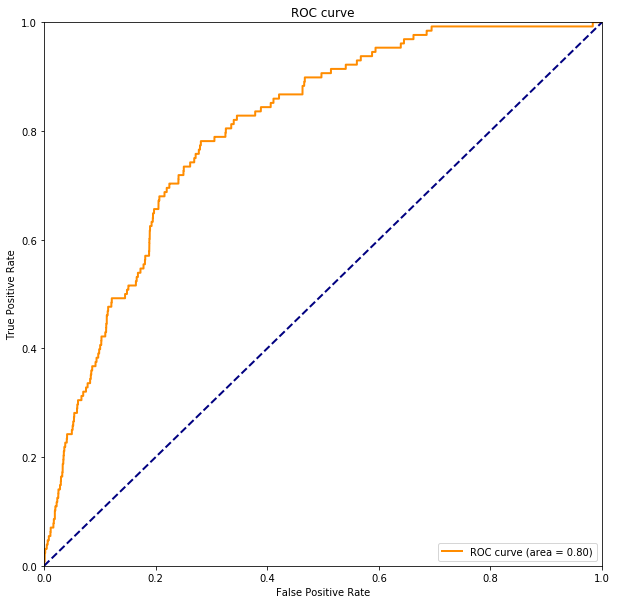

In [16]:
illus_roc_curve(real,pred)

In [1]:
pred = result.predict(data[reg_cols])
for t in [1e-5,1e-4,1e-3,1e-2]:
    print(t)
    pred2 = pred.apply(lambda x: 1 if x>t else 0)
    real = data['if_downgraded']
    confusion_matrix(pred2,real)

NameError: name 'result' is not defined